<a href="https://colab.research.google.com/github/skshama438/RFM-Based-Customer-Segmentation-for-an-Online-Retail-Store/blob/main/RFM_Based_Customer_Segmentation_for_an_Online_Retail_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title:
--------
RFM-Based Customer Segmentation for an Online Retail Store

Description:
------------
This project focuses on analyzing and segmenting customers from an online retail dataset using RFM (Recency, Frequency, Monetary) analysis. The goal is to uncover customer behavior patterns, identify high-value segments, and support data-driven marketing strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df=pd.read_csv("online_retail.csv")

describing the data
---------------------

In [ ]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
152750    549690     22694                         WICKER STAR          1   
152751    549690     22663          JUMBO BAG DOLLY GIRL DESIGN         1   
152752    549690     20723             STRAWBERRY CHARLOTTE BAG         3   
152753    549690     22384              LUNCH BAG PINK POLKADOT         2   
152754    549690     22382           LUNCH BAG SPACEBOY DESIGN          1   

                InvoiceDate  UnitPrice  CustomerID         Country  
0     

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,152755.000000,152755.000000,105812.000000
mean,9.008746,5.148254,15285.753223
std,273.870545,101.951572,1733.790384
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13842.000000
50%,3.000000,2.460000,15179.000000
75%,10.000000,4.210000,16863.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152755 entries, 0 to 152754
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    152755 non-null  object 
 1   StockCode    152755 non-null  object 
 2   Description  152131 non-null  object 
 3   Quantity     152755 non-null  int64  
 4   InvoiceDate  152755 non-null  object 
 5   UnitPrice    152755 non-null  float64
 6   CustomerID   105812 non-null  float64
 7   Country      152755 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.3+ MB


the above data set consists of the 8 columns and consists of object,int ,float data types

In [ ]:
df.shape

(152755, 8)

the above data set consists of 211408 records and 8 fields

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


starting 5 rows of the data set

In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152750,549690,22694,WICKER STAR,1,2023-04-11 13:41:00,2.10,17841.0,United Kingdom
152751,549690,22663,JUMBO BAG DOLLY GIRL DESIGN,1,2023-04-11 13:41:00,2.08,17841.0,United Kingdom
152752,549690,20723,STRAWBERRY CHARLOTTE BAG,3,2023-04-11 13:41:00,0.85,17841.0,United Kingdom
152753,549690,22384,LUNCH BAG PINK POLKADOT,2,2023-04-11 13:41:00,1.65,17841.0,United Kingdom
152754,549690,22382,LUNCH BAG SPACEBOY DESIGN,1,2023-04-11 13:41:00,1.65,17841.0,United Kingd


last rows of the data set

identifying values
--------------------

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,624
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,46943
Country,0


description and customerid consists of the missing vlaues

In [ ]:
df.isnull().mean()*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.408497
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,30.730909
Country,0.000000


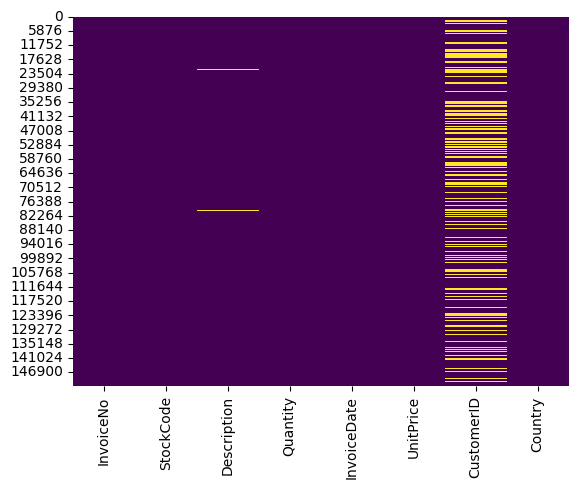

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.show()

in above graph the yellow color is indicating the missing values the customer id is consists of the missing values more than the 5 percentage

handling the missing values
----------------------------

In [ ]:
df["Description"]

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
152750,WICKER STAR
152751,JUMBO BAG DOLLY GIRL DESIGN
152752,STRAWBERRY CHARLOTTE BAG
152753,LUNCH BAG PINK POLKADOT


In [ ]:
df["Description"].fillna(df["Description"].mode()[0],inplace=True)

In [ ]:
df["CustomerID"]

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0
...,...
152750,17841.0
152751,17841.0
152752,17841.0
152753,17841.0


Removing rows with missing CustomerID
-----------------------------------------

In [ ]:
df = df.dropna(subset=['CustomerID'])

finding the duplicates
------------------------

In [ ]:
df.duplicated().sum()

np.int64(1356)

the data is consists of the duplicate rows

In [ ]:
df["InvoiceNo"]

,InvoiceNo
0,536365
1,536365
2,536365
3,536365
4,536365
...,...
152750,549690
152751,549690
152752,549690
152753,549690


In [ ]:
df["InvoiceNo"].sample(30)

,InvoiceNo
38473,539579
14799,537620
19386,537855
115544,546133
58447,541241
135003,547876
148823,549257
122472,546875
2000,536551
31033,538890




Excluding cancelled invoices (InvoiceNo starting with 'C')
----------------------------------------------------------


In [ ]:
df = df.drop(index=df[df['InvoiceNo'].astype(str).str.contains(r'^C')].index)

Removing negative or zero quantities and prices

In [ ]:
def remove_non_positive(df, column):
    return df.drop(index=df[df[column] <= 0].index)
df=remove_non_positive(df,"Quantity")

In [ ]:
print(df[df["Quantity"]<=0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [ ]:
df=remove_non_positive(df,"UnitPrice")

In [ ]:
print(df[df["UnitPrice"]<=0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


 Exploratory Data Analysis (EDA)
----------------

Analyze transaction volume by country:

In [ ]:
df.groupby("Country")["InvoiceNo"].nunique()

,InvoiceNo
Country,
Australia,22
Austria,5
Belgium,27
Canada,1
Channel Islands,6
Cyprus,9
Czech Republic,1
Denmark,3
EIRE,60


the above code tell How many invoices (orders) were placed per country

Total quantity sold

In [ ]:
df.groupby("Country")["Quantity"].sum()

,Quantity
Country,
Australia,25455
Austria,1375
Belgium,5870
Canada,88
Channel Islands,3378
Cyprus,4257
Czech Republic,346
Denmark,1557
EIRE,31722


total sales amount(revenue)

In [ ]:
df["Totalamount"]=df["Quantity"]*df["UnitPrice"]
df.groupby("Country")["Totalamount"].sum()

,Totalamount
Country,
Australia,42741.57
Austria,2503.68
Belgium,9275.01
Canada,140.54
Channel Islands,6333.15
Cyprus,7410.95
Czech Republic,549.26
Denmark,5659.71
EIRE,68658.07


Number of customers per country

In [ ]:
df.groupby("Country")["CustomerID"].nunique()

,CustomerID
Country,
Australia,8
Austria,5
Belgium,15
Canada,1
Channel Islands,6
Cyprus,5
Czech Republic,1
Denmark,3
EIRE,3


Identify top-selling products
------------------------------

In [ ]:
top_selling_product=df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
print(top_selling_product.head(10))

Description
MEDIUM CERAMIC TOP STORAGE JAR        74215
WORLD WAR 2 GLIDERS ASSTD DESIGNS     17284
JUMBO BAG RED RETROSPOT               13450
WHITE HANGING HEART T-LIGHT HOLDER    13417
PACK OF 72 RETROSPOT CAKE CASES       13241
PACK OF 12 LONDON TISSUES             10792
SMALL POPCORN HOLDER                   9127
ASSORTED COLOUR BIRD ORNAMENT          8997
MINI PAINT SET VINTAGE                 8569
GROW A FLYTRAP OR SUNFLOWER IN TIN     8523
Name: Quantity, dtype: int64


Visualize purchase trends over time:
--------------------------------------

Plotting Total Revenue Over Time (Daily)

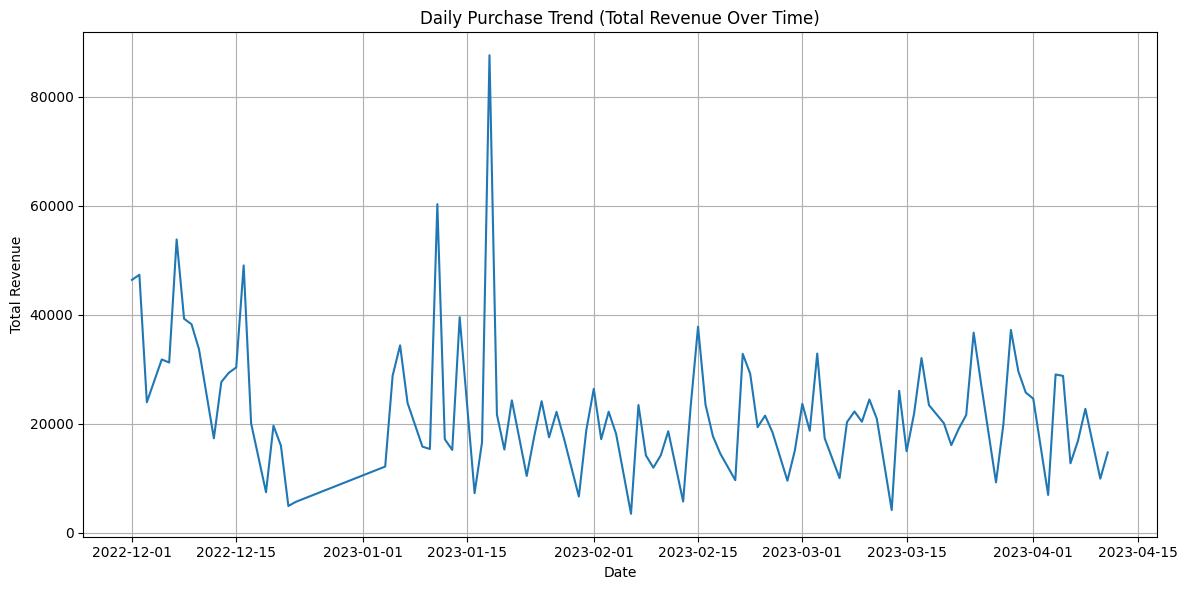

In [ ]:
df["Totalamount"]=df["Quantity"]*df["UnitPrice"]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) # converting the invoice into date time
daily_sales = df.groupby(df["InvoiceDate"].dt.date)["Totalamount"].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title("Daily Purchase Trend (Total Revenue Over Time)")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

when we see this graph it shows the high range of  sales in dec 1 to dec 16 in year 2022 but range of the sales falls low from the dec 21 to dec 25
after the chrismas the sales are gradually increasing the sales in the year 2023 January month

<Axes: xlabel='InvoiceDate'>

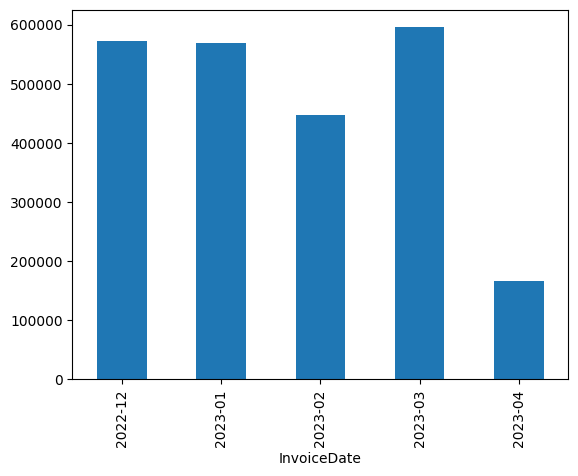

In [ ]:
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Totalamount"].sum()
monthly_sales.plot(kind='bar')

December 2022 had much higher sales

January 2023 had significantly lower sales

Number of transactions over time
----------------------------------

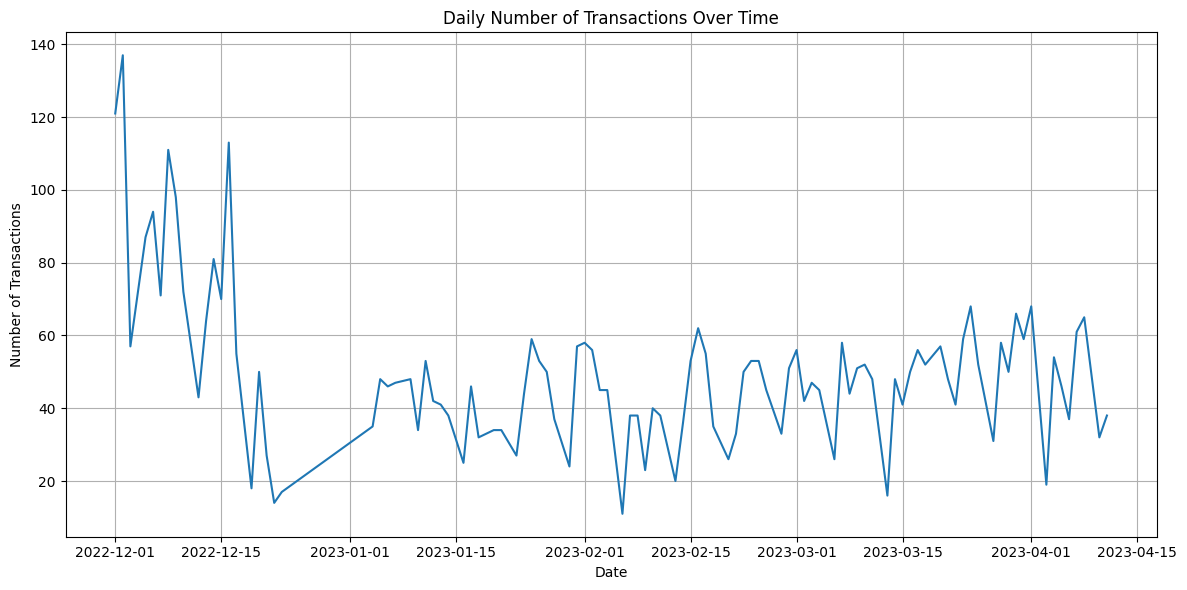

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
daily_transaction=df.groupby(df["InvoiceDate"].dt.date)["InvoiceNo"].nunique()
plt.figure(figsize=(12, 6))
daily_transaction.plot()
plt.title("Daily Number of Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()


 December 1–16: High Activity
 Transactions drop steadily after the 16th.
  January (Post-December): Gradual Increase

<Axes: xlabel='InvoiceDate'>

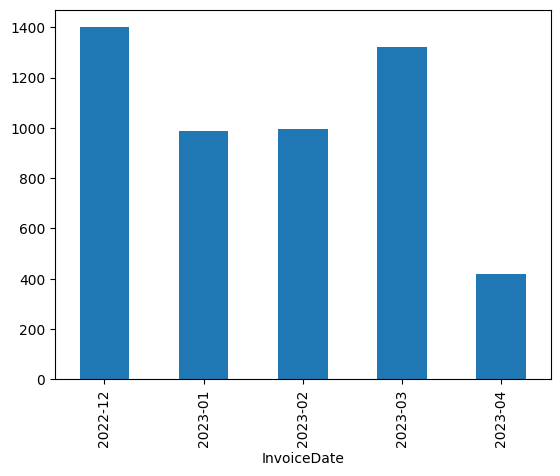

In [ ]:
daily_transaction=df.groupby(df["InvoiceDate"].dt.to_period("M"))["InvoiceNo"].nunique()
daily_transaction.plot(kind='bar')

after observing the above graph, the in the 12 month it consists of the high orders and in the January month it consists of the low orders

Quantity of items sold over time:
--------------------------------

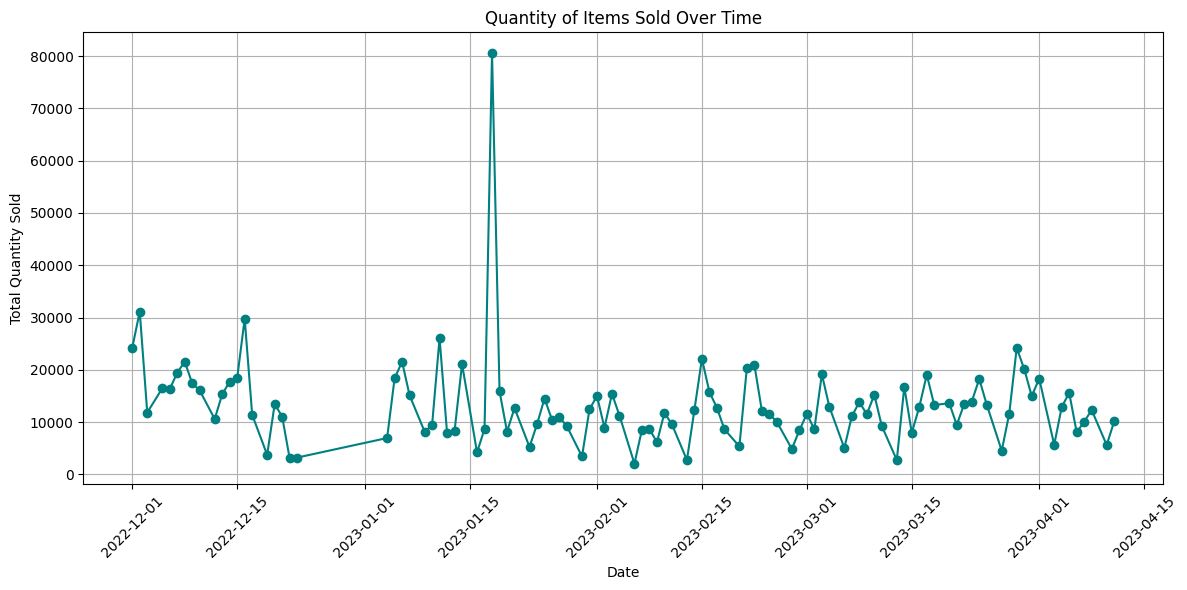

In [ ]:
quantity_items=df.groupby(df["InvoiceDate"].dt.date)["Quantity"].sum()
plt.figure(figsize=(12, 6))
plt.plot(quantity_items.index, quantity_items.values, marker='o', linestyle='-', color='teal')
plt.title('Quantity of Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='InvoiceDate'>

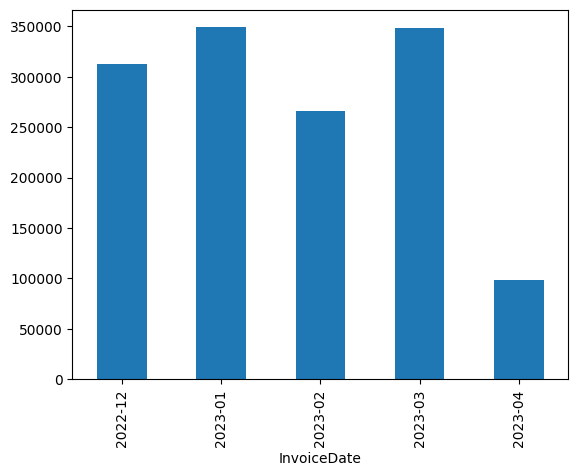

In [ ]:
quantity_items=df.groupby(df["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()
quantity_items.plot(kind='bar')

Inspect monetary distribution per transaction and customer

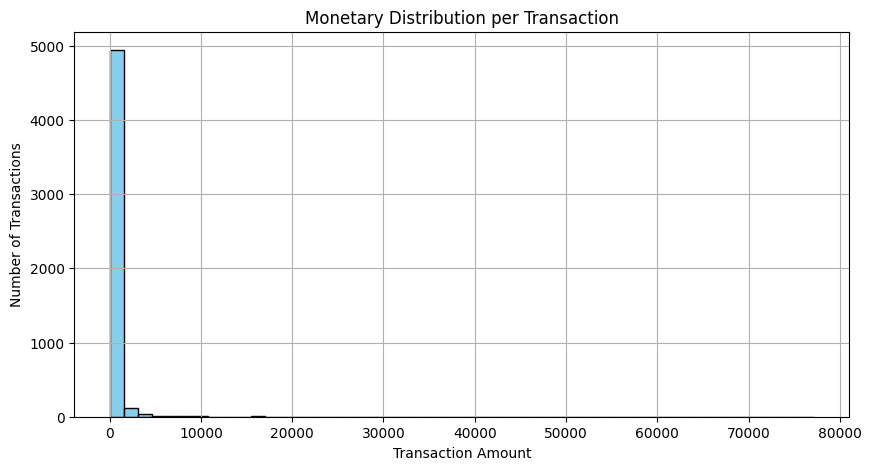

In [ ]:
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
transaction_amounts = df.groupby("InvoiceNo")["TotalAmount"].sum()
plt.figure(figsize=(10, 5))
plt.hist(transaction_amounts, bins=50, color='skyblue', edgecolor='black')
plt.title("Monetary Distribution per Transaction")
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

The highest frequency lies in the ₹0–₹500 range.

distribution per customer:
--------------------------

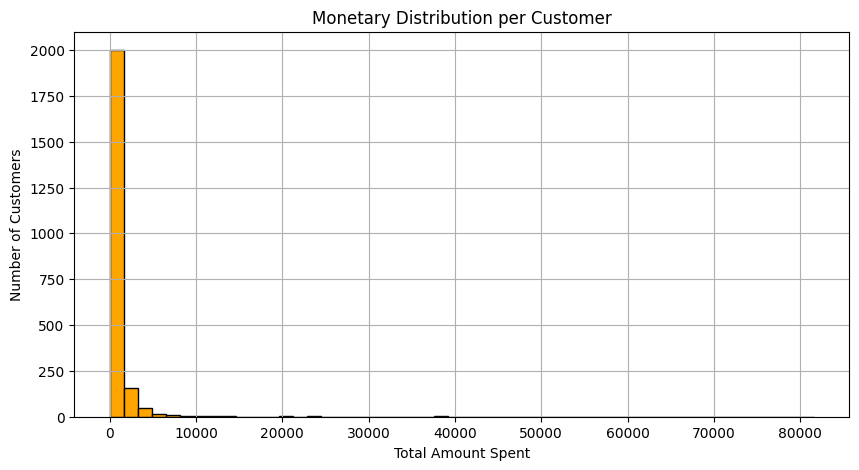

In [ ]:
customer_amounts = df.groupby("CustomerID")["TotalAmount"].sum()
plt.figure(figsize=(10, 5))
plt.hist(customer_amounts, bins=50, color='orange', edgecolor='black')
plt.title("Monetary Distribution per Customer")
plt.xlabel("Total Amount Spent")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

RFM distributions:
-------------------

Recency	How recently a customer made a purchase (lower = better)
Frequency	How often a customer made a purchase (higher = better)
Monetary	How much the customer has spent in total (higher = better)

In [ ]:


# Reference date (e.g., last date in the dataset + 1)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'     # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
})

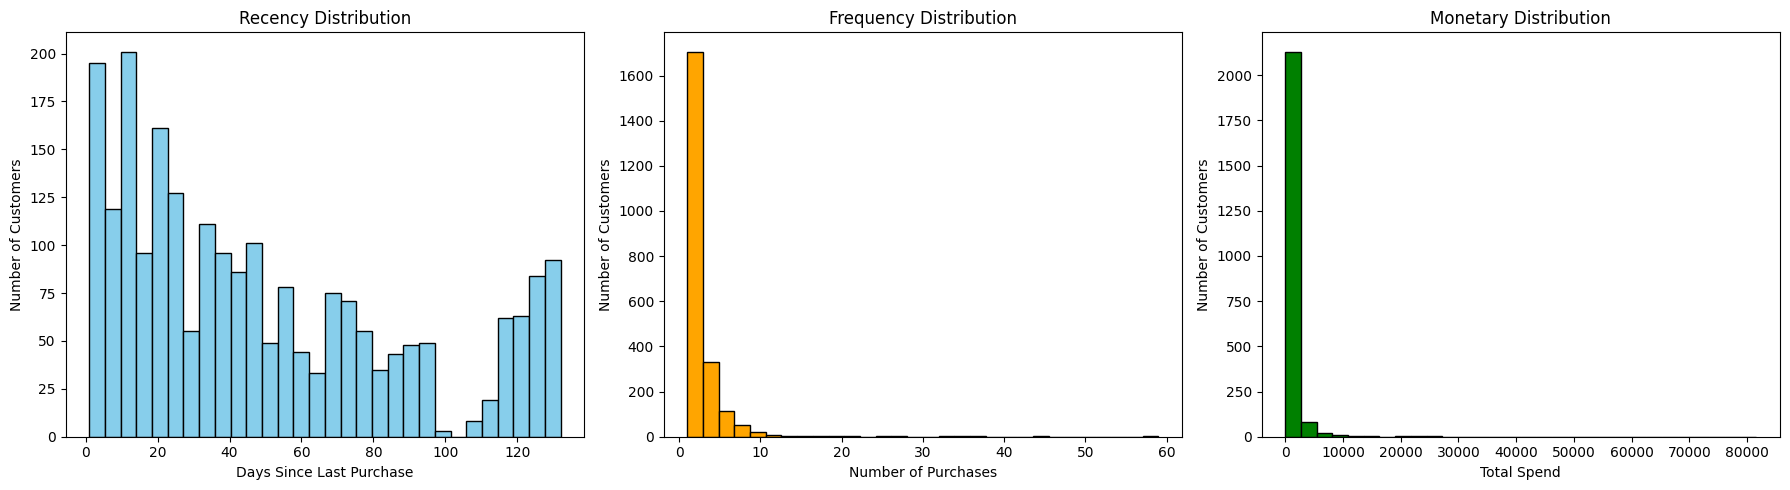

In [ ]:
plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')

# Frequency
plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=30, color='orange', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')

# Monetary
plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=30, color='green', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Normalize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [ ]:
inertia = []  # List to hold the sum of squared distances
K = range(1, 11)  # Try k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

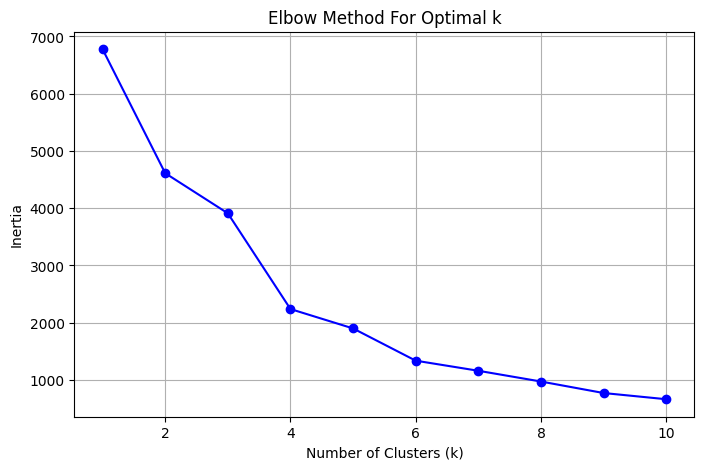

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [ ]:
cluster_profiles = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

# Add number of customers in each cluster
cluster_profiles['Num_Customers'] = rfm['Cluster'].value_counts().sort_index()

# Round for better readability
cluster_profiles = cluster_profiles.round(2)

# Show the result
print(cluster_profiles)

         Recency  Frequency  Monetary  Num_Customers
Cluster                                             
0          11.83      23.71  13265.55             24
1          50.01       2.02    770.98           2229
2          24.00       8.67  52349.77              6


Product recommendation heatmap / similarity matrix:
------------------------------------------------------


In [ ]:
user_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose so we compare products instead of customers
product_similarity = cosine_similarity(user_product_matrix.T)

# Create a DataFrame with product names as both rows and columns
similarity_df = pd.DataFrame(
    product_similarity,
    index=user_product_matrix.columns,
    columns=user_product_matrix.columns
)

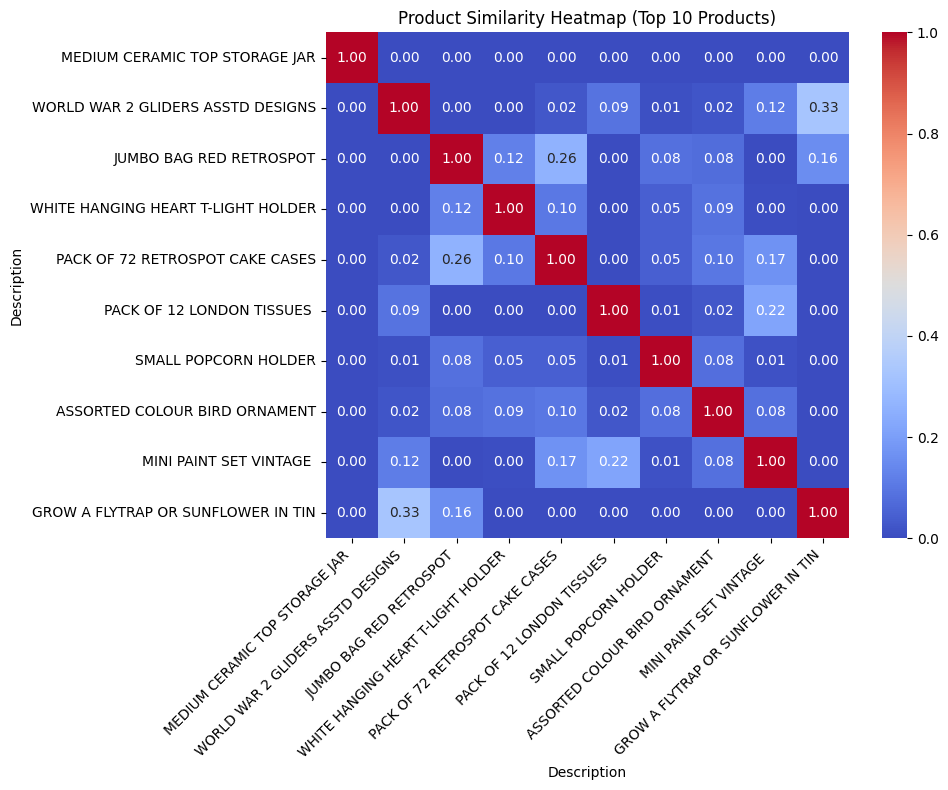

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick top 10 products by total quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).index

# Filter the similarity matrix for these top products
top_similarity = similarity_df.loc[top_products, top_products]

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(top_similarity, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Product Similarity Heatmap (Top 10 Products)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Clustering Methodology:
-------------------------

 Feature Engineering:
 -----------------------

one-hot encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=["Country"], drop_first=True)

frequency encoding

In [ ]:
desc_freq = df["Description"].value_counts().to_dict()
df["Description_Freq"] = df["Description"].map(desc_freq)

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Latest date in dataset
latest_date = df["InvoiceDate"].max()

# Calculate Recency for each CustomerID
recency_df = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
recency_df["Recency"] = (latest_date - recency_df["InvoiceDate"]).dt.days

In [ ]:
unique_invoices = df[["CustomerID", "InvoiceNo"]].drop_duplicates()

# Group by CustomerID and count InvoiceNo
frequency_df = unique_invoices.groupby("CustomerID").count().reset_index()
frequency_df.rename(columns={"InvoiceNo": "Frequency"}, inplace=True)

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Group by CustomerID and sum the TotalPrice
monetary_df = df.groupby("CustomerID")["TotalPrice"].sum().reset_index()
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace=True)

In [ ]:
rfm = recency_df.merge(frequency_df, on="CustomerID").merge(monetary_df, on="CustomerID")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only RFM features
rfm_values = rfm[["Recency", "Frequency", "Monetary"]]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm_values)

# Convert back to DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=["Recency", "Frequency", "Monetary"])

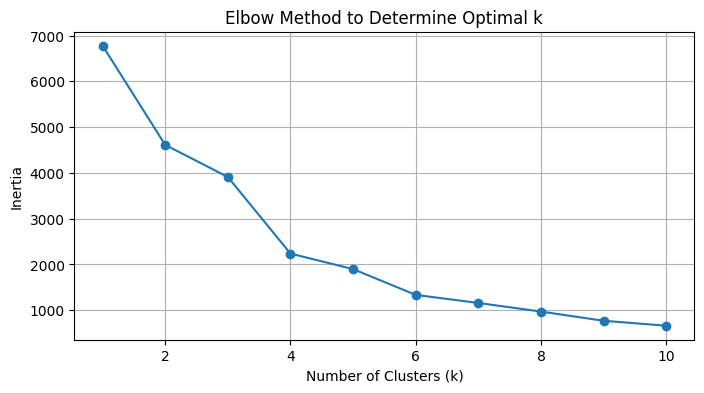

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

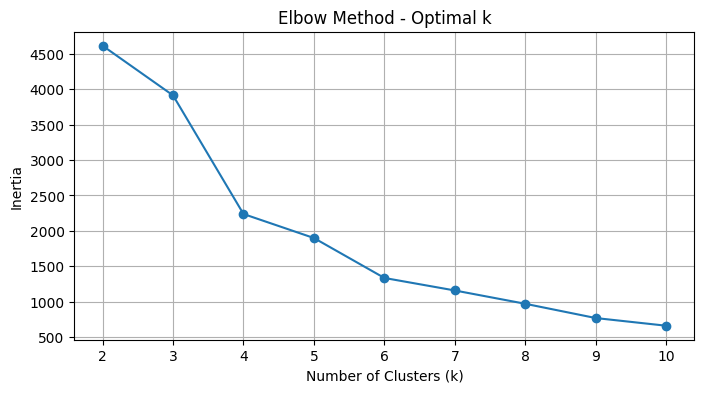

In [ ]:
inertia = []
k_range = range(2, 11)  # Start from 2 (1 cluster has no silhouette)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal k')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Assuming optimal k (e.g., 4) from Elbow/Silhouette
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

In [ ]:
rfm['Cluster'] = rfm_scaled_df['Cluster']

In [ ]:
cluster_profiles = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

cluster_profiles

,Recency,Frequency,Monetary
Cluster,,,
0,24.7,2.4,947.8
1,96.8,1.3,452.3
2,44.5,8.5,79398.1
3,11.9,22.8,18664.8


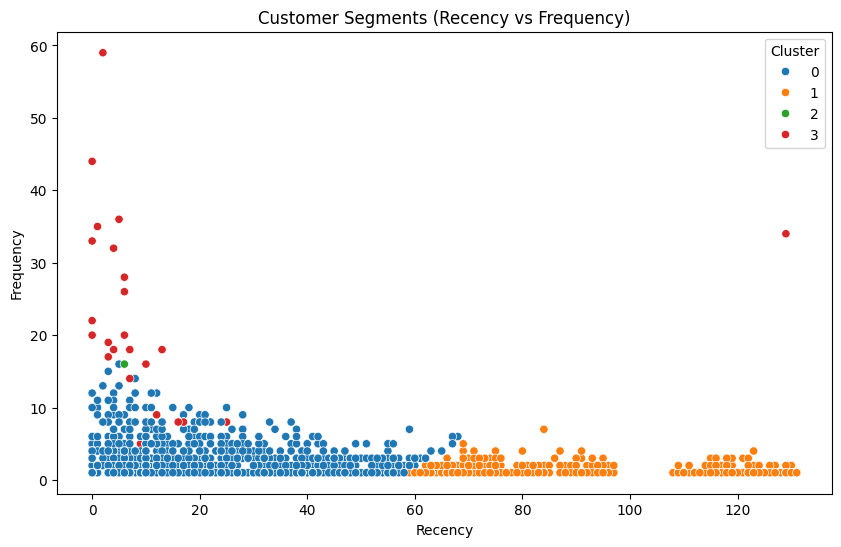

In [ ]:
rfm['Cluster'] = kmeans.labels_

# 2D Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='tab10')
plt.title('Customer Segments (Recency vs Frequency)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

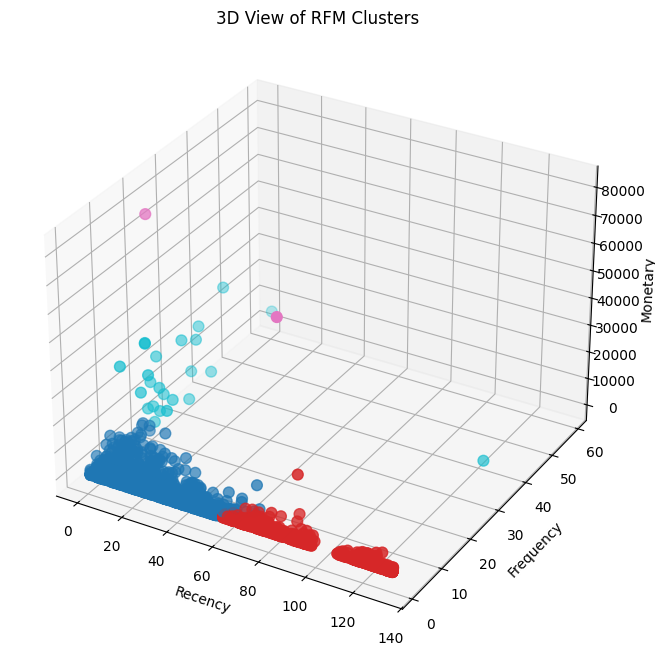

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter in 3D
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
           c=rfm['Cluster'], cmap='tab10', s=60)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D View of RFM Clusters')
plt.show()

/tmp/ipython-input-1254826628.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x="RFM_Score", palette="viridis")


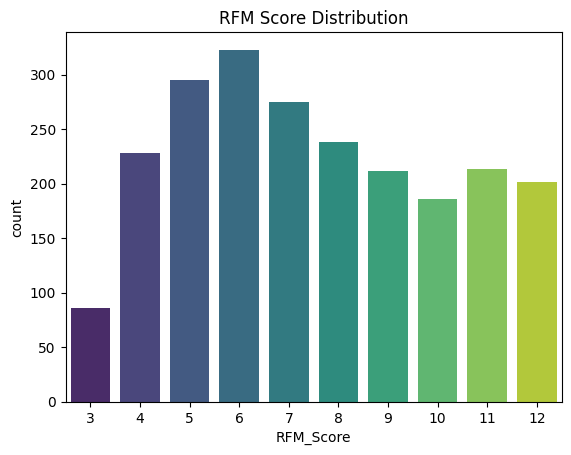

In [ ]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalAmount": "sum"
})
rfm.columns = ["Recency", "Frequency", "Monetary"]

# RFM Scoring
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])
rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)

# Plot RFM Score Distribution
sns.countplot(data=rfm, x="RFM_Score", palette="viridis")
plt.title("RFM Score Distribution")
plt.show()


In [ ]:
rfm_summary = rfm.groupby("RFM_Score").size().reset_index(name="Count")
print(rfm_summary.sort_values(by="RFM_Score", ascending=False))


   RFM_Score  Count
9         12    202
8         11    214
7         10    186
6          9    212
5          8    238
4          7    275
3          6    323
2          5    295
1          4    228
0          3     86


final analytical step to summarize how many customers fall into each RFM score bucket.

RFM Analysis Summary & Business Insights:
-------------------------------------------
What We Did:
Recency: Calculated days since last purchase for each customer.

Frequency: Counted unique purchases per customer.

Monetary: Summed total spend by each customer.

RFM Scores: Ranked and segmented customers into 4 categories per metric and combined into a composite score.

Key Insights:
----------------
High RFM Scores (9–12): Represent your best customers – recent, frequent, and high spenders. Focus on loyalty programs or premium offers.

Medium RFM Scores (5–8): These customers are average. Consider engagement campaigns to increase frequency or spend.

Low RFM Scores (3–4 or below): These are either new or at-risk customers. Target with discounts, win-back campaigns, or special offers.

Most Common Segment: RFM Score x (e.g., 555) — indicates a concentration of moderate customers. (Customize this after checking your output)

Project Conclusion:
---------------------------
The analysis of the Online Retail dataset gave insights into:

Top-selling products and revenue-driving countries

Sales trends over time

A structured segmentation of customers using RFM metrics